# Demo Wine - Exploration données

Dataset https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Attribute Information:

```
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)
```

## Lecture des données

In [4]:
import pandas as pd 

df = pd.read_csv("wine-quality.csv")

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Valeurs manquantes

In [6]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)[:20]

quality                 0.0
alcohol                 0.0
sulphates               0.0
pH                      0.0
density                 0.0
total sulfur dioxide    0.0
free sulfur dioxide     0.0
chlorides               0.0
residual sugar          0.0
citric acid             0.0
volatile acidity        0.0
fixed acidity           0.0
dtype: float64

## Distribution variable à expliquer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

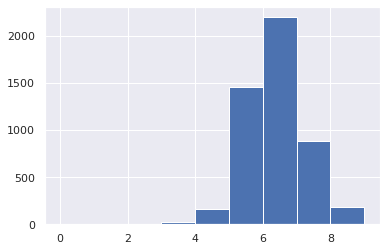

In [9]:
bin_sizes, _, _ = plt.hist(df.quality, bins=range(0, 10))

In [18]:
df_low_grade = df[df["quality"]<7].assign(score=4)
df_good = df[df["quality"]>=7].assign(score=3)
df_very_good = df[df["quality"]>=8].assign(score=2)
df_best = df[df["quality"]>=9].assign(score=1)
print("all %d" % len(df))
print("good %d" % len(df_good))
print("very good %d" % len(df_very_good))
print("best %d" % len(df_best))

all 4898
good 1060
very good 180
best 5


## Variables explicatives

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [30]:
df_best.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0,5.0
mean,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.18000,9.0,1.0
std,0.983362,0.057619,0.082037,3.759255,0.007436,13.427584,19.824228,0.003118,0.082885,0.092628,1.01341,0.0,0.0
min,6.600000,0.240000,0.290000,1.600000,0.018000,24.000000,85.000000,0.989650,3.200000,0.360000,10.40000,9.0,1.0
25%,6.900000,0.260000,0.340000,2.000000,0.021000,27.000000,113.000000,0.989800,3.280000,0.420000,12.40000,9.0,1.0
50%,7.100000,0.270000,0.360000,2.200000,0.031000,28.000000,119.000000,0.990300,3.280000,0.460000,12.50000,9.0,1.0
75%,7.400000,0.360000,0.450000,4.200000,0.032000,31.000000,124.000000,0.990550,3.370000,0.480000,12.70000,9.0,1.0
max,9.100000,0.360000,0.490000,10.600000,0.035000,57.000000,139.000000,0.997000,3.410000,0.610000,12.90000,9.0,1.0


In [57]:
cols = df.columns.to_list()
print(cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Correlation entre variables

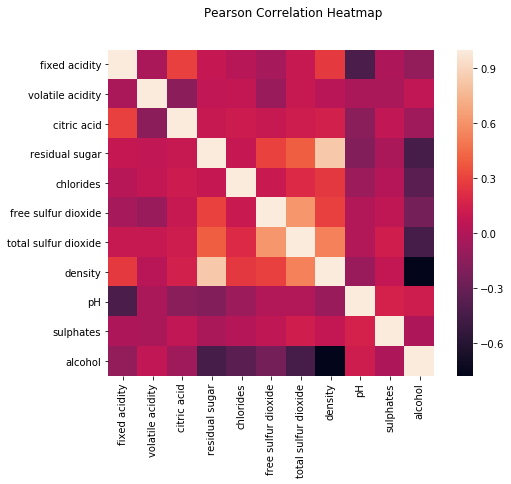

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('precision',2)
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(['quality'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

## Correlation entre variable à expliquer et les autres valeurs

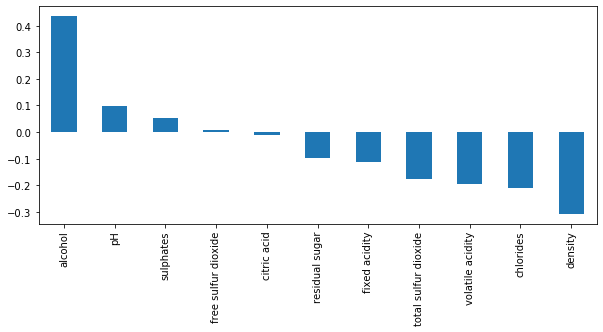

In [14]:
corr_with_quality = df.corr()["quality"].sort_values(ascending=False)
plt.figure(figsize=(10,4))
corr_with_quality.drop("quality").plot.bar()
plt.show()

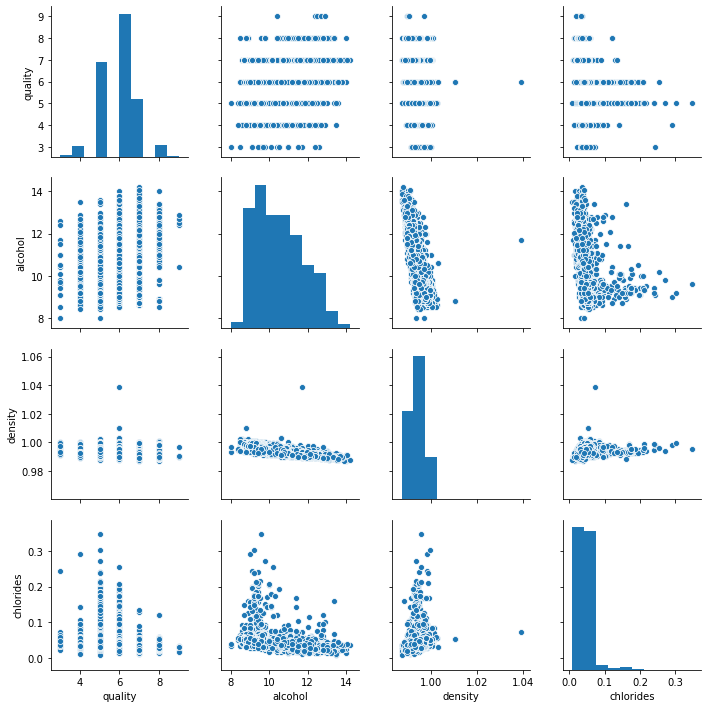

In [15]:
sns.pairplot(df[['quality', 'alcohol', 'density', 'chlorides']])
plt.show()

## Correlations 

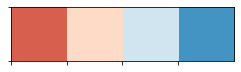

In [16]:
#palette = sns.color_palette("muted")
palette = sns.color_palette("RdBu", n_colors=4)
#palette = sns.color_palette("Blues_d", n_colors=4)
#palette = sns.color_palette("ch:2.5,-.2,dark=.3", n_colors=4)
sns.palplot(palette)

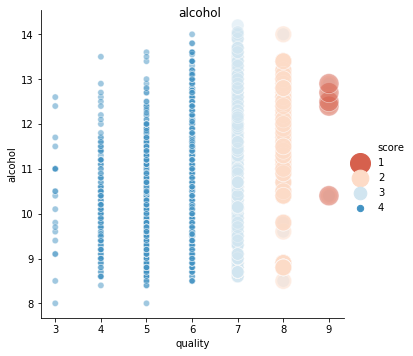

In [19]:
for col in ['alcohol']:
    df_score = pd.concat([df_low_grade, df_good, df_very_good, df_best])  
    plot = sns.relplot(x="quality", y=col, hue="score", size="score",
            sizes=(400, 40), alpha=.5, palette=palette,
            height=5, data=df_score)
    plot.fig.suptitle(col)

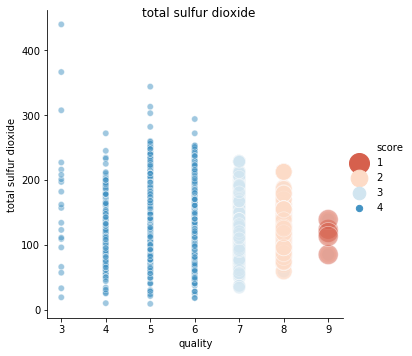

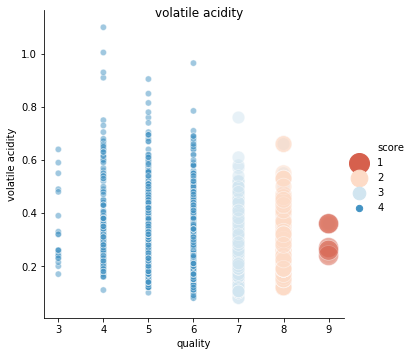

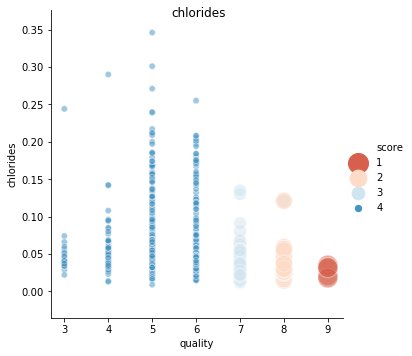

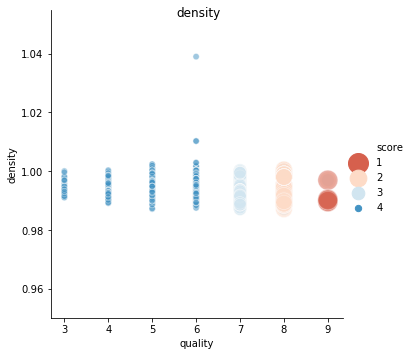

In [20]:
for col in [ 'total sulfur dioxide', 'volatile acidity', 'chlorides',  'density']:
    df_score = pd.concat([df_low_grade, df_good, df_very_good, df_best])  
    plot = sns.relplot(x="quality", y=col, hue="score", size="score",
            sizes=(400, 40), alpha=.5, palette=palette,
            height=5, data=df_score)
    plot.fig.suptitle(col)